# Introduction

> Time series data is an important source for information and strategy used in various businesses. From a conventional finance industry to education industry, they play a major role in understanding a lot of details on specific factors with respect to time. So I decided to work through a simple example using python and I have explained all the details in this blog.

![](https://www.cienciadedatos.net/images/forecasting_multi-step_en.gif)

> This file contains Microsoft stock market information from 04/01/2015 through 04/01/2021. It was acquired in Google Sheets using the command 'GOOGLEFINANCE'
> the files have the following columns:
> Date - in format: yy-mm-dd
> 
> Open - price of the stock at market open 
> 
> High - Highest price reached in the day
> 
> Low Close - Lowest price reached in the day
> 
> Volume - Number of shares traded
> 


# Table of content


* Data Preprocessing
* Data Visualization
* STATIONARITY
* Trend
* Smoothing
* Seasonality (along with Trend):Differencing
* Modelling:
* ACF
* PACF
* ARIMA



# Data Preprocessing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
%matplotlib inline

In [2]:
data=pd.read_csv("../input/microsoft-stock-time-series-analysis/Microsoft_Stock.csv")

In [3]:
data

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438
...,...,...,...,...,...,...
1506,3/25/2021 16:00:00,235.30,236.94,231.57,232.34,34061853
1507,3/26/2021 16:00:00,231.55,236.71,231.55,236.48,25479853
1508,3/29/2021 16:00:00,236.59,236.80,231.88,235.24,25227455
1509,3/30/2021 16:00:00,233.53,233.85,231.10,231.85,24792012


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1511 non-null   object 
 1   Open    1511 non-null   float64
 2   High    1511 non-null   float64
 3   Low     1511 non-null   float64
 4   Close   1511 non-null   float64
 5   Volume  1511 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 71.0+ KB


> Since we are working with time series, the most essential features are the time related feature. So , we will convert dataime to index In this example, we have the column DateTime which uniquely identifies a day and Time  .This column is provided in string format. So we will convert it to the datetime64[ns] data type.

In [5]:
from datetime import datetime
data['Date'] = pd.to_datetime(data['Date'])

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1511 non-null   datetime64[ns]
 1   Open    1511 non-null   float64       
 2   High    1511 non-null   float64       
 3   Low     1511 non-null   float64       
 4   Close   1511 non-null   float64       
 5   Volume  1511 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 71.0 KB


In [7]:
data.shape

(1511, 6)

In [8]:
data.set_index("Date",inplace=True)

In [9]:
data

,Open,High,Low,Close,Volume
Date,,,,,
2015-04-01 16:00:00,40.60,40.76,40.31,40.72,36865322
2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476
2015-04-06 16:00:00,40.34,41.78,40.18,41.55,39223692
2015-04-07 16:00:00,41.61,41.91,41.31,41.53,28809375
2015-04-08 16:00:00,41.48,41.69,41.04,41.42,24753438
...,...,...,...,...,...
2021-03-25 16:00:00,235.30,236.94,231.57,232.34,34061853
2021-03-26 16:00:00,231.55,236.71,231.55,236.48,25479853
2021-03-29 16:00:00,236.59,236.80,231.88,235.24,25227455


In [10]:
data.isna().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [11]:
data.describe()

,Open,High,Low,Close,Volume
count,1511.000000,1511.000000,1511.000000,1511.000000,1.511000e+03
mean,107.385976,108.437472,106.294533,107.422091,3.019863e+07
std,56.691333,57.382276,55.977155,56.702299,1.425266e+07
min,40.340000,40.740000,39.720000,40.290000,1.016120e+05
25%,57.860000,58.060000,57.420000,57.855000,2.136213e+07
50%,93.990000,95.100000,92.920000,93.860000,2.662962e+07
75%,139.440000,140.325000,137.825000,138.965000,3.431962e+07
max,245.030000,246.130000,242.920000,244.990000,1.352271e+08


# Data Visualization

  Let's draw a chart showing how volume , high and low prices hanges over time .

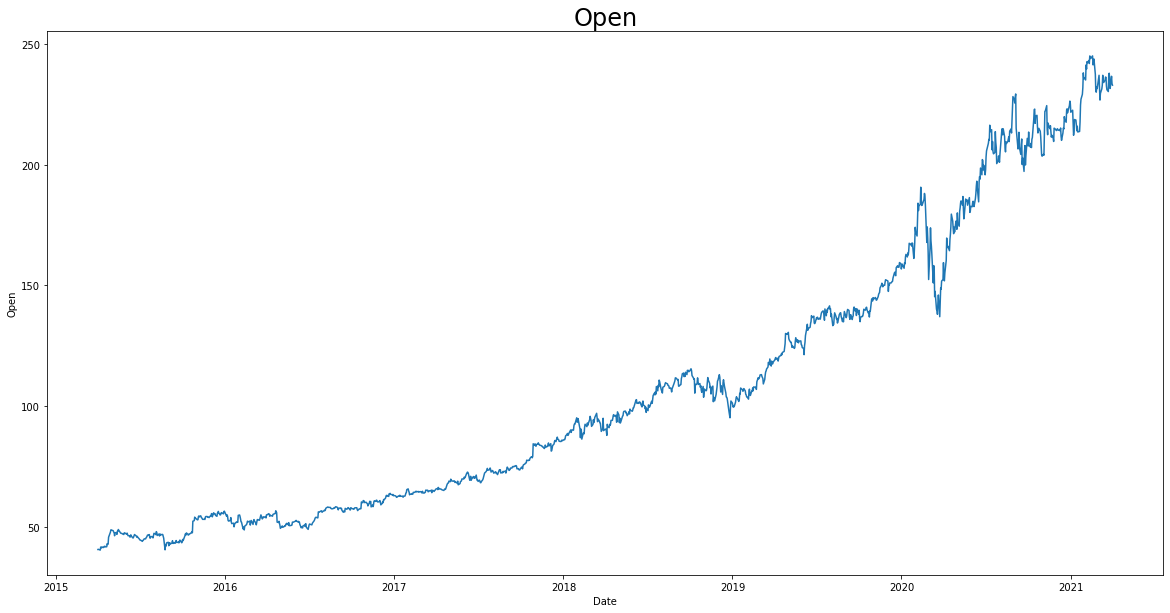

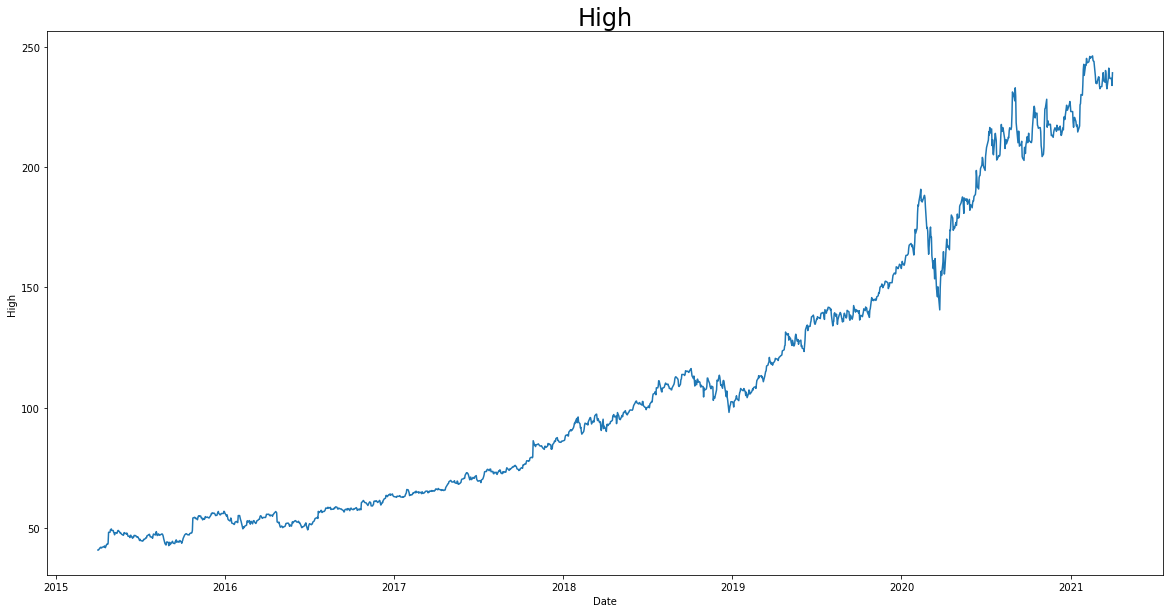

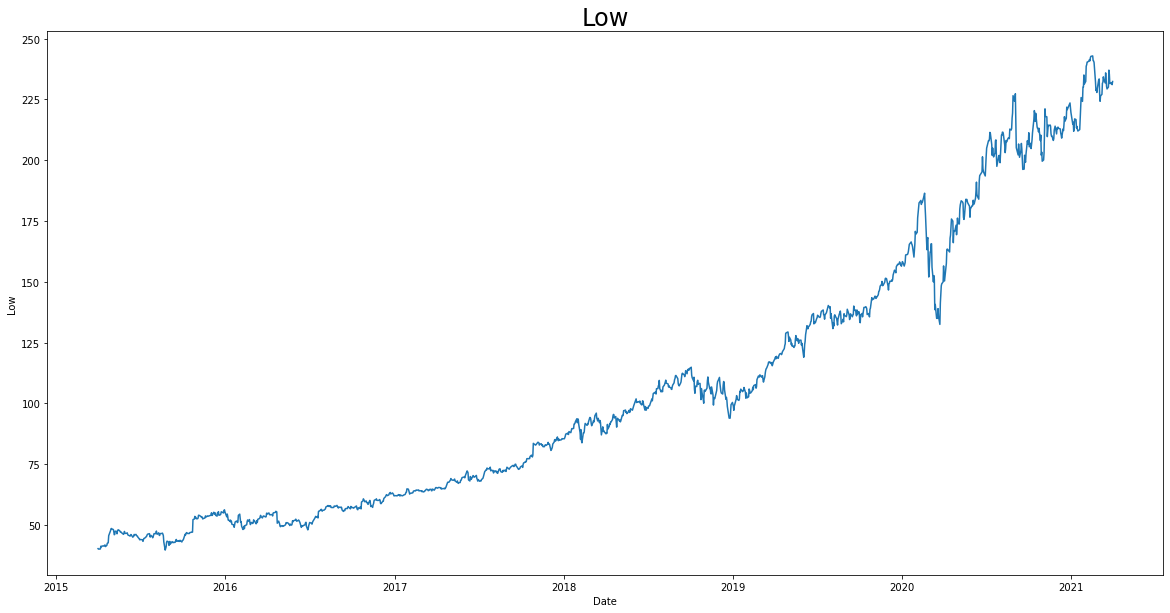

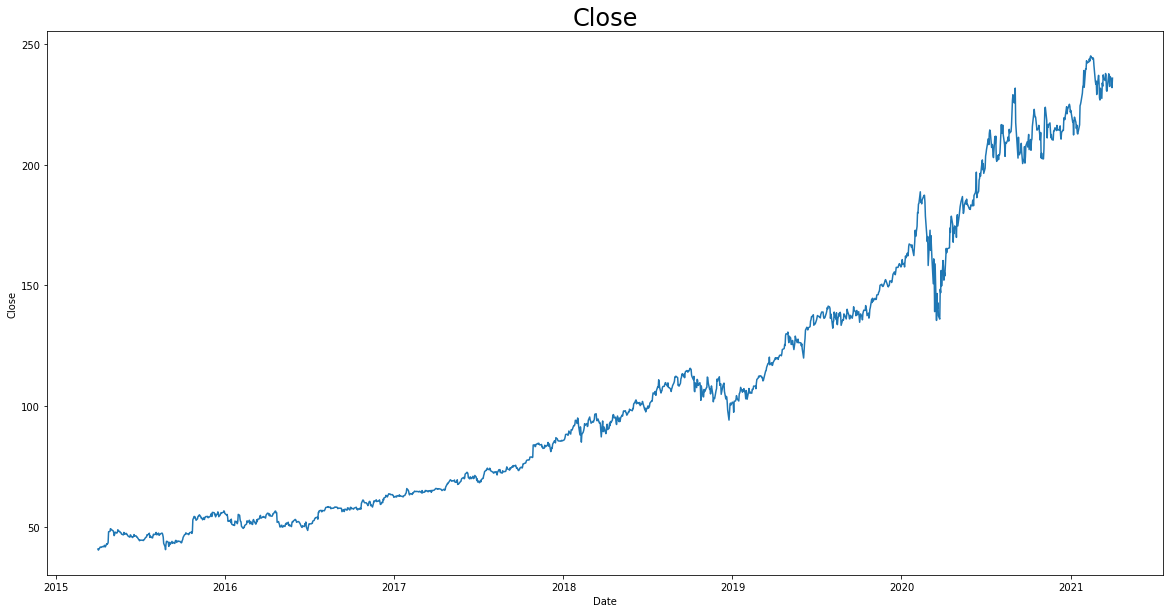

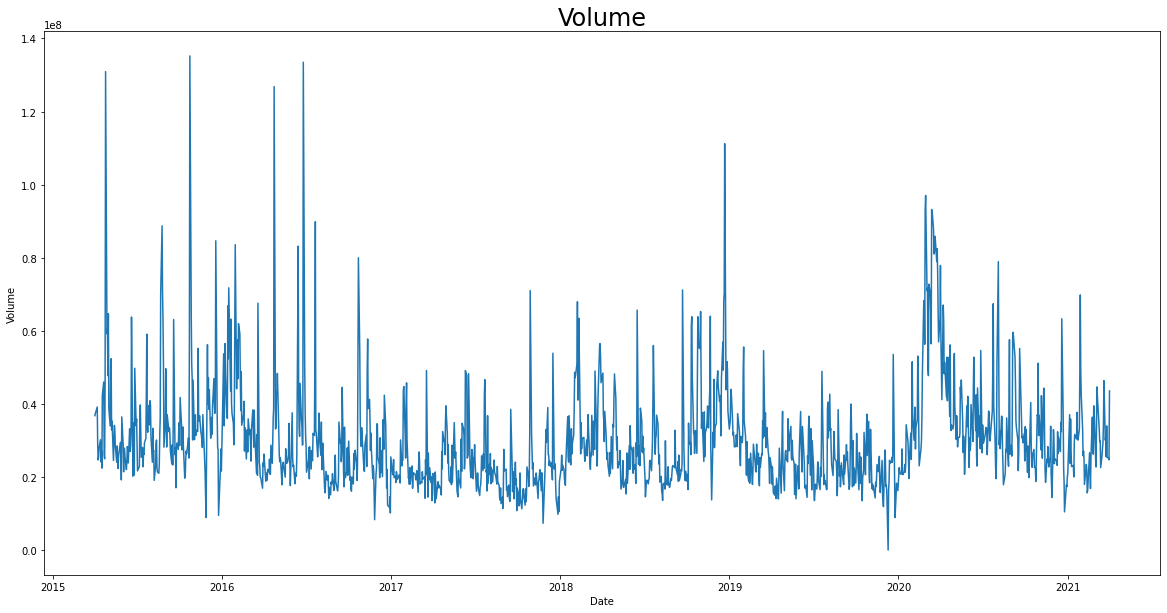

In [12]:
for col in data.columns:
    plt.figure(figsize=(20,10))
    sns.lineplot(x = data.index ,y = data[col],data = data)
    plt.title(col , fontsize=24)
    plt.show()

**It’s clear from the plots that there is an overall increase in the trend,with some seasonality in Volume plot**

# STATIONARITY

> This is a very important concept in Time Series Analysis. In order to apply a time series model, it is important for the Time series to be stationary; in other words all its statistical properties (mean,variance) remain constant over time. This is done basically because if you take a certain behavior over time, it is important that this behavior is same in the future in order for us to forecast the series. There are a lot of statistical theories to explore stationary series than non-stationary series

> **In practice we can assume the series to be stationary if it has constant statistical properties over time and these properties can be:**
> 
> • constant mean
> 
> • constant variance
> 
> • an auto co-variance that does not depend on time.

The stationarity of a series can be established by looking at the plot of the series:
* like we did earlier 
* Plotting Rolling Statistics :The function will plot the moving mean or moving Standard Deviation. 
This is still visual method Also ,There are multiple implementations of Unit Root tests like:

>  Augmented Dickey Fuller test (ADH Test)             
> 
>  Kwiatkowski-Phillips-Schmidt-Shin – KPSS test (trend stationary)
> 
>  Philips Perron test (PP Test)

The most commonly used is the **Dickey-fuller Test** :This is one of the statistical tests for checking stationarity. First we consider the null hypothesis: the time series is non- stationary. The result from the rest will contain the test statistic and critical value for different confidence levels. The idea is to have Test statistics less than critical value, in this case we can reject the null hypothesis and say that this Time series is indeed stationary

In [13]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #Determing rolling statistics
    MA = timeseries.rolling(window = 10).mean()
    MSTD = timeseries.rolling(window = 10).std()

    #Plot rolling statistics:
    plt.figure(figsize=(20,10))
    orig = plt.plot(timeseries, color='pink',label='Original')
    mean = plt.plot(MA, color='b', label='Rolling Mean')
    std = plt.plot(MSTD, color='g', label = 'Rolling Std')
    plt.title('Rolling Mean & Standard Deviation')
    plt.legend(loc='best')
    plt.show()

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfout = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfout['Critical Value (%s)'%key] = value
    print(dfout)

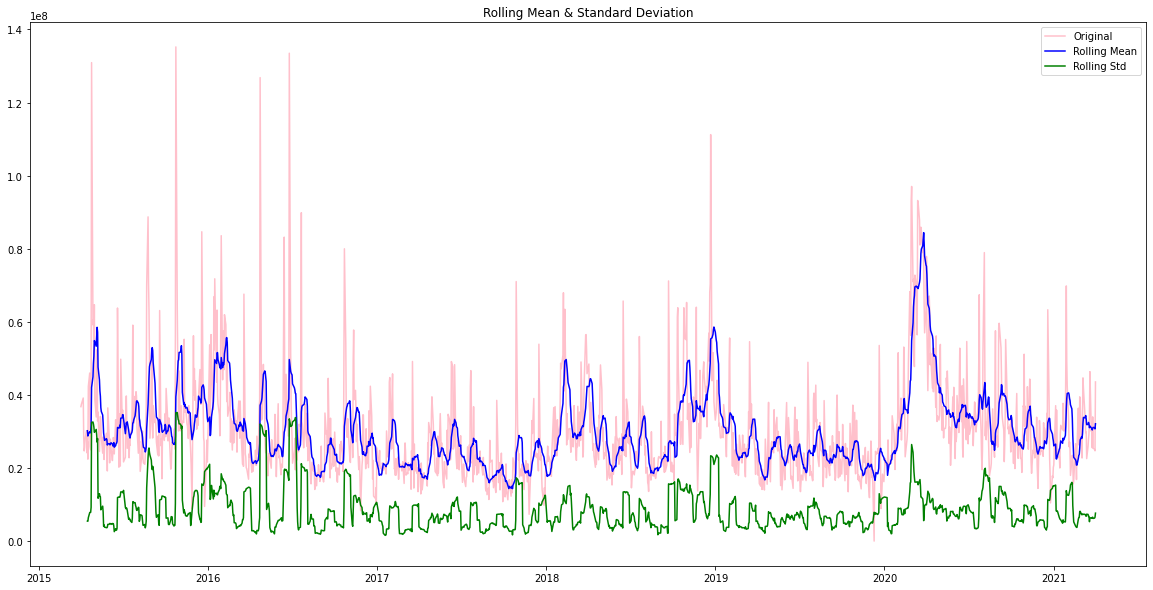

Results of Dickey-Fuller Test:
Test Statistic                -6.899656e+00
p-value                        1.291812e-09
#Lags Used                     8.000000e+00
Number of Observations Used    1.502000e+03
Critical Value (1%)           -3.434711e+00
Critical Value (5%)           -2.863466e+00
Critical Value (10%)          -2.567795e+00
dtype: float64


In [14]:
test_stationarity(data['Volume'])

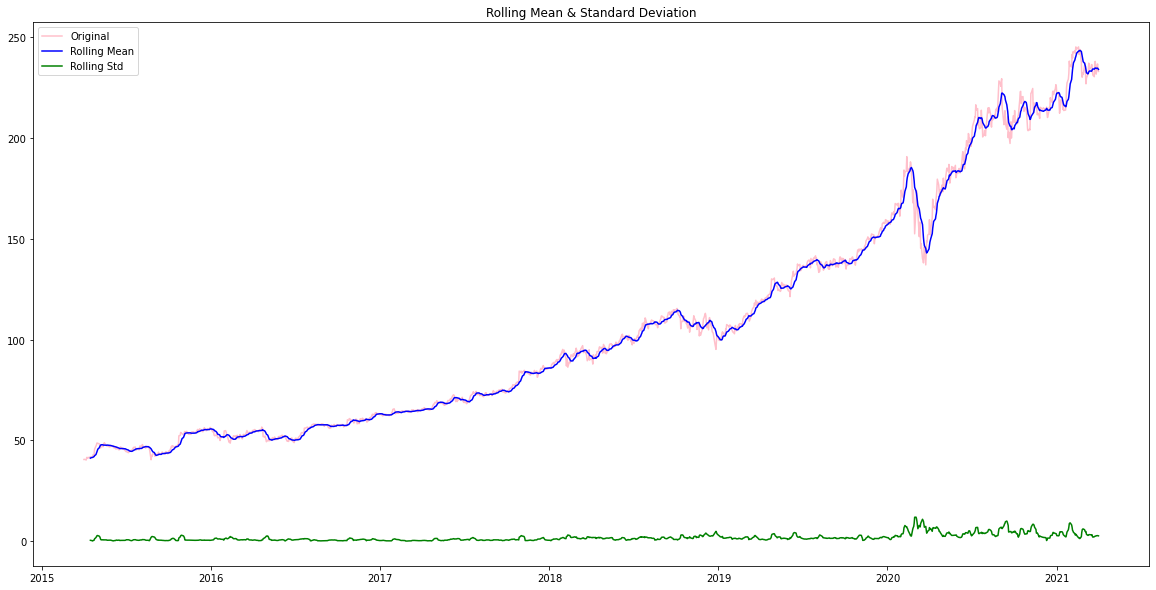

Results of Dickey-Fuller Test:
Test Statistic                    0.823915
p-value                           0.992013
#Lags Used                        2.000000
Number of Observations Used    1508.000000
Critical Value (1%)              -3.434694
Critical Value (5%)              -2.863459
Critical Value (10%)             -2.567791
dtype: float64


In [15]:
test_stationarity(data['Open'])

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1511 entries, 2015-04-01 16:00:00 to 2021-03-31 16:00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1511 non-null   float64
 1   High    1511 non-null   float64
 2   Low     1511 non-null   float64
 3   Close   1511 non-null   float64
 4   Volume  1511 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 103.1 KB


> This is not stationary because :
> 
> • mean is increasing even though the std is small.
> 
> • Test stat is > critical value.
> 
> • Note: the signed values are compared and the absolute values.

# Transformation

There are two major factors that make a time series non-stationary. They are:

• Trend: non-constant mean

• Seasonality: Variation at specific time-frames

# Trend
> 
> The first step is to reduce the trend using transformation, as we can see here that there is a strong positive trend. These transformation can be log, sq-rt, cube root etc . Basically it penalizes larger values more than the smaller. In this case we will use the logarithmic transformation.

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1511 entries, 2015-04-01 16:00:00 to 2021-03-31 16:00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1511 non-null   float64
 1   High    1511 non-null   float64
 2   Low     1511 non-null   float64
 3   Close   1511 non-null   float64
 4   Volume  1511 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 103.1 KB


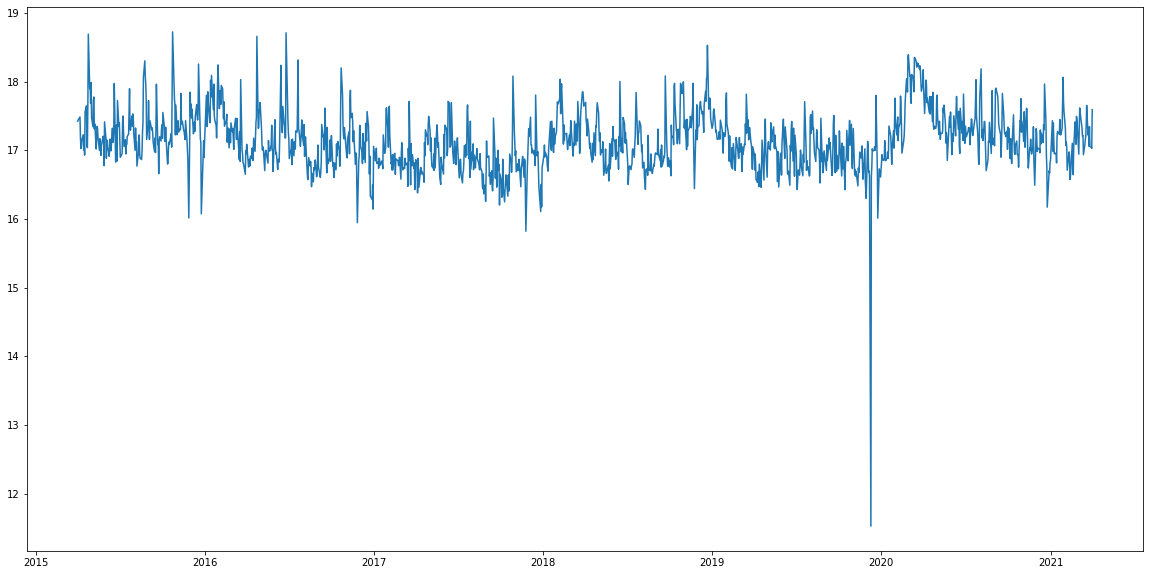

In [18]:
plt.figure(figsize=(20,10))
ts_log=np.log(data['Volume'])
plt.plot(ts_log)

> There is some noise in realizing the forward trend here. There are some methods to model these trends and then remove them from the series. Some of the common ones are:
> 
> **• Smoothing: using rolling/moving average**
> 
> **• Aggression: by taking the mean for a certain time period (year/month)**

# Smoothing

Smoothening of a time series may be useful in:
* Reducing the effect of noise in a signal get a fair approximation of the noise-filtered series.
* The smoothed version of series can be used as a feature to explain the original series itself.
* Visualize the underlying trend better

**So how to smoothen a series**
* Take a moving average
* Do a LOESS smoothing (Localized Regression)
* Do a LOWESS smoothing (Locally Weighted Regression)
* Moving average is nothing but the average of a rolling window of defined width. But you must choose the window-width wisely, because, large window-size will over-smooth the series. For example, a window-size equal to the seasonal duration (ex: 12 for a month-wise series), will effectively nullify the seasonal effect.

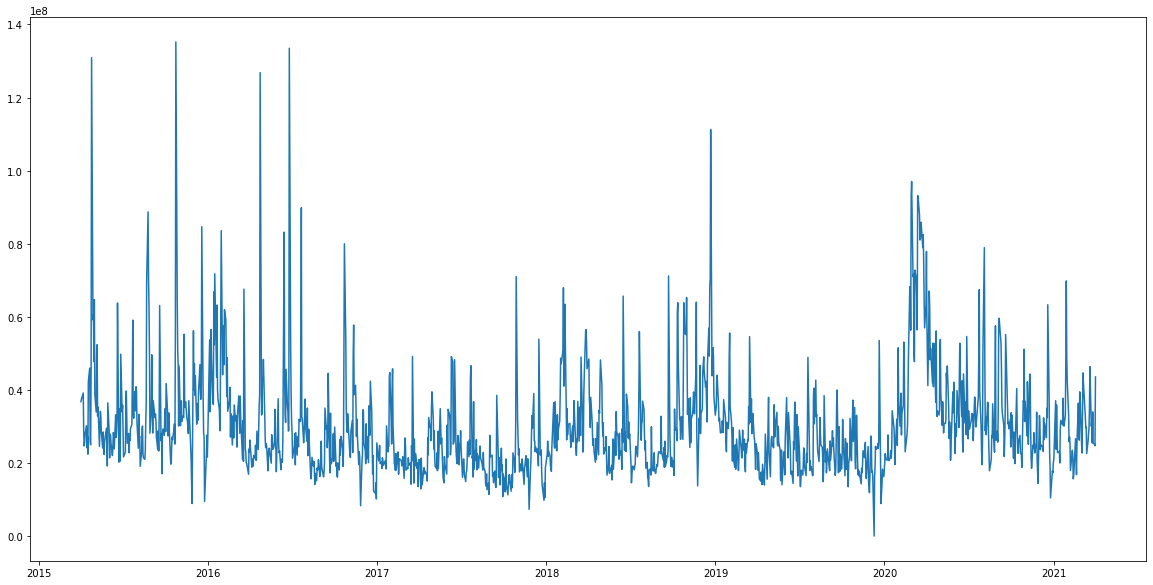

In [19]:
plt.figure( figsize=(20,10) )
plt.plot(data['Volume'])

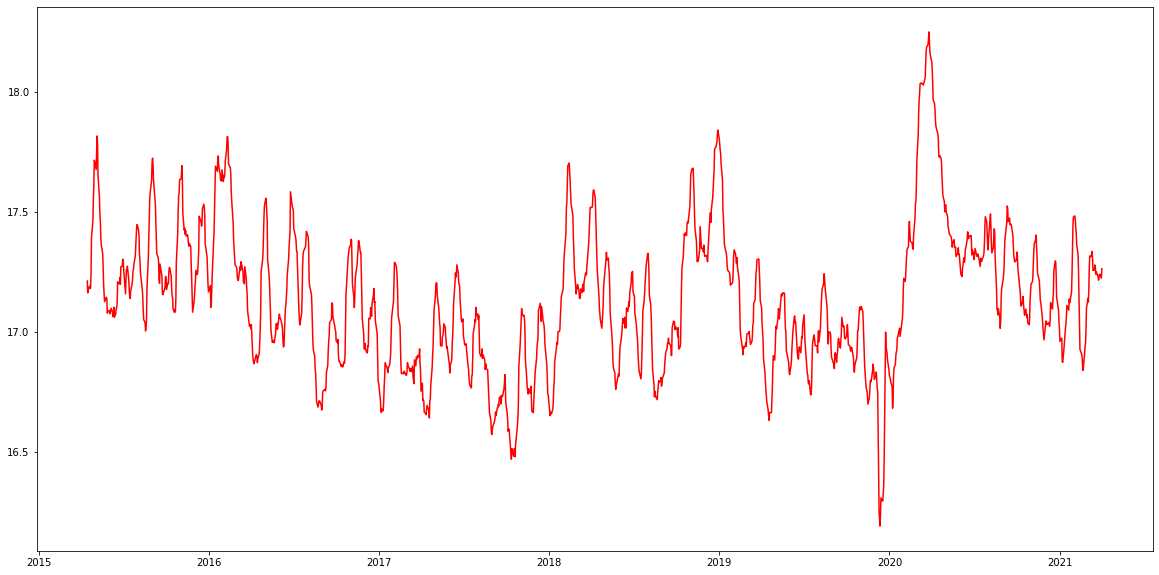

In [20]:
plt.figure(figsize=(20,10))
moving_averge=ts_log.rolling(window = 10).mean()
plt.plot(moving_averge , color='red')

Now subtract the rolling mean from the original series.

In [21]:
moving_avg_diff= ts_log-moving_averge
moving_avg_diff

Date
2015-04-01 16:00:00         NaN
2015-04-02 16:00:00         NaN
2015-04-06 16:00:00         NaN
2015-04-07 16:00:00         NaN
2015-04-08 16:00:00         NaN
                         ...   
2021-03-25 16:00:00    0.115931
2021-03-26 16:00:00   -0.186116
2021-03-29 16:00:00   -0.192891
2021-03-30 16:00:00   -0.197805
2021-03-31 16:00:00    0.328359
Name: Volume, Length: 1511, dtype: float64

In [22]:
moving_avg_diff.dropna(inplace=True)
moving_avg_diff

Date
2015-04-15 16:00:00   -0.087286
2015-04-16 16:00:00   -0.232491
2015-04-17 16:00:00    0.388136
2015-04-20 16:00:00    0.455114
2015-04-21 16:00:00   -0.105945
                         ...   
2021-03-25 16:00:00    0.115931
2021-03-26 16:00:00   -0.186116
2021-03-29 16:00:00   -0.192891
2021-03-30 16:00:00   -0.197805
2021-03-31 16:00:00    0.328359
Name: Volume, Length: 1502, dtype: float64

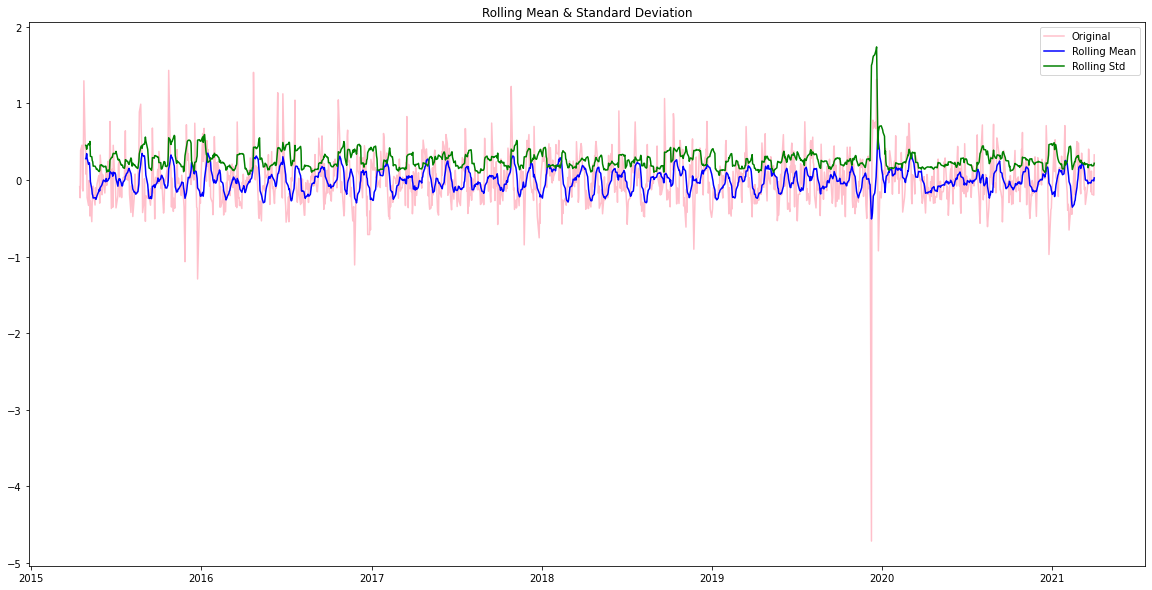

Results of Dickey-Fuller Test:
Test Statistic                -1.222250e+01
p-value                        1.099157e-22
#Lags Used                     2.000000e+01
Number of Observations Used    1.481000e+03
Critical Value (1%)           -3.434773e+00
Critical Value (5%)           -2.863494e+00
Critical Value (10%)          -2.567810e+00
dtype: float64


In [23]:
test_stationarity(moving_avg_diff)

# Seasonality (along with Trend)

Previously we saw just trend part of the time series, now we will see both trend and seasonality. Most Time series have trends along with seasonality. There are two common methods to remove trend and seasonality, they are:

• Differencing: by taking difference using time lag

• Decomposition: model both trend and seasonality, then remove them



**Differencing:**

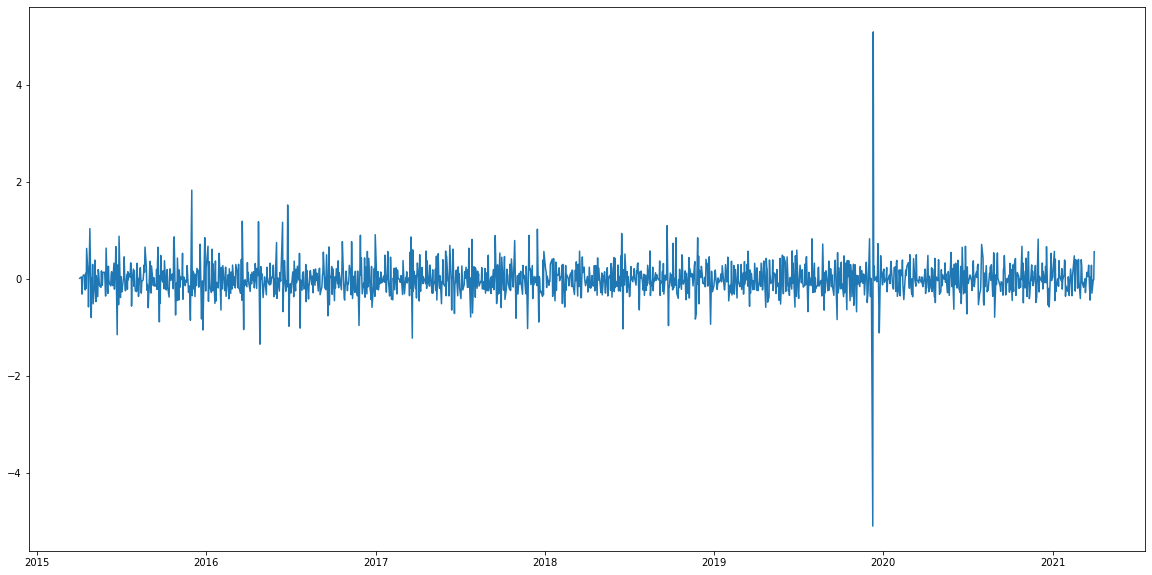

In [24]:
plt.figure(figsize=(20,10))
ts_log_diff=ts_log-ts_log.shift()
plt.plot(ts_log_diff)

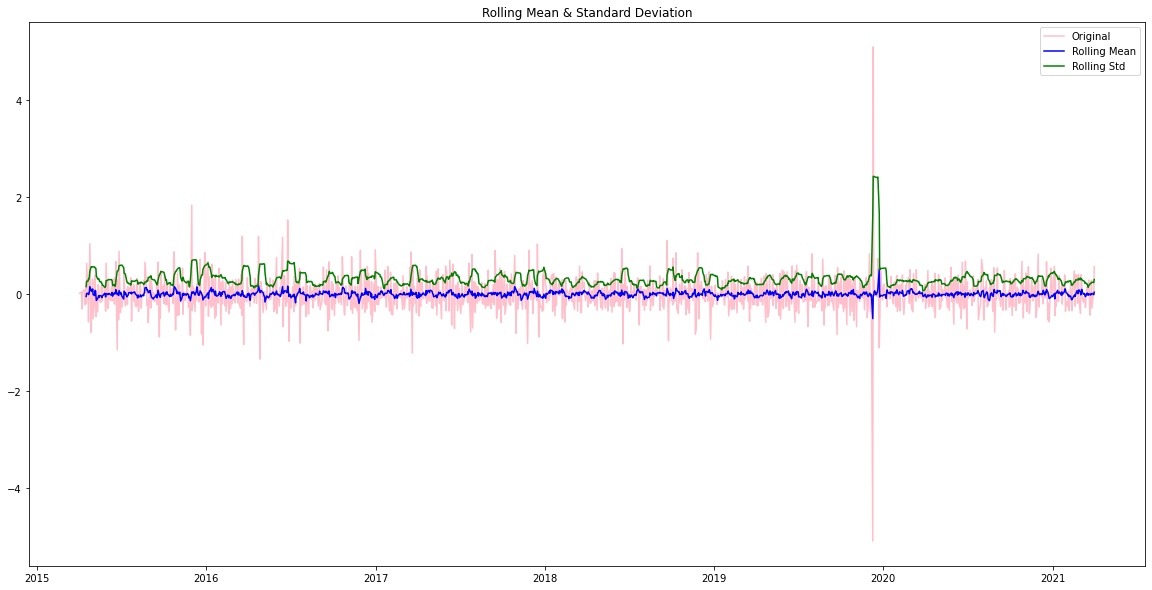

Results of Dickey-Fuller Test:
Test Statistic                -1.277553e+01
p-value                        7.608278e-24
#Lags Used                     2.400000e+01
Number of Observations Used    1.485000e+03
Critical Value (1%)           -3.434761e+00
Critical Value (5%)           -2.863488e+00
Critical Value (10%)          -2.567807e+00
dtype: float64


In [25]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

# Modelling

> Now let’s check out on how we can figure out what value of p and q to use. We use two popular plotting techniques; they are:
> 
> • **Autocorrelation Function (ACF)**: It just measures the correlation between two consecutive (lagged version). example at lag 4, ACF will compare series at time instance t1…t2 with series at instance t1–4…t2–4
> 
> • **Partial Autocorrelation Function (PACF)**: is used to measure the degree of association between y(t) and y(t-p).

# ACF

**Autocorrelation Function (ACF)**

> Use the autocorrelation function (ACF) to identify which lags have significant correlations, understand the patterns and properties of the time series, and then use that information to model the time series data. From the ACF, you can assess the randomness and stationarity of a time series. You can also determine whether trends and seasonal patterns are present.
> 
> In an ACF plot, each bar represents the size and direction of the correlation. Bars that extend across the red line are statistically significant.

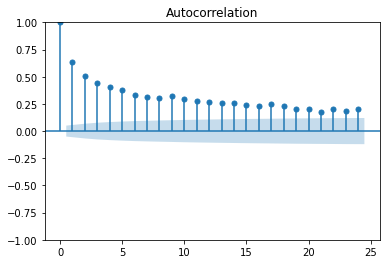

<Figure size 1440x720 with 0 Axes>

In [26]:
from statsmodels.graphics import tsaplots
# Display the autocorrelation plot of your time series
tsaplots.plot_acf(data['Volume'], lags=24 )
plt.figure(figsize=(20,10))
plt.show()

# PACF

**Partial Autocorrelation Function (PACF)**

> The partial autocorrelation function is similar to the ACF except that it displays only the correlation between two observations that the shorter lags between those observations do not explain. For example, the partial autocorrelation for lag 3 is only the correlation that lags 1 and 2 do not explain. In other words, the partial correlation for each lag is the unique correlation between those two observations after partialling out the intervening correlations.

/opt/conda/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


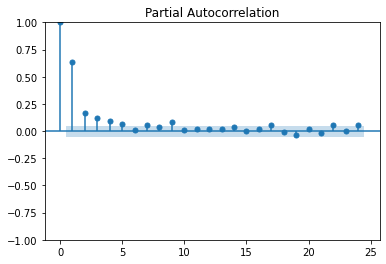

<Figure size 1440x720 with 0 Axes>

In [27]:
tsaplots.plot_pacf(data['Volume'], lags=24 )
plt.figure(figsize=(20,10))
plt.show()

# ARIMA

> Auto Regressive Integrated Moving Average(ARIMA) — It is like a liner regression equation where the predictors depend on parameters (p,d,q) of the ARIMA model .
> 
> Let's explain these dependent parameters:
> 
> • p : This is the number of AR (Auto-Regressive) terms . Example — if p is 3 the predictor for y(t) will be y(t-1),y(t-2),y(t-3).
> 
> • q : This is the number of MA (Moving-Average) terms . Example — if p is 3 the predictor for y(t) will be y(t-1),y(t-2),y(t-3).
> 
> • d :This is the number of differences or the number of non-seasonal differences .

![](https://www.simplilearn.com/ice9/free_resources_article_thumb/Time_Series_Analysis_In_Python_4.png)

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 Volume   No. Observations:                 1511
Model:                 ARIMA(1, 1, 2)   Log Likelihood              -26585.774
Date:                Wed, 08 Feb 2023   AIC                          53179.547
Time:                        08:33:07   BIC                          53200.827
Sample:                             0   HQIC                         53187.472
                               - 1511                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6208      0.060     10.362      0.000       0.503       0.738
ma.L1         -1.1367      0.065    -17.361      0.000      -1.265      -1.008
ma.L2          0.1874      0.055      3.384      0.0

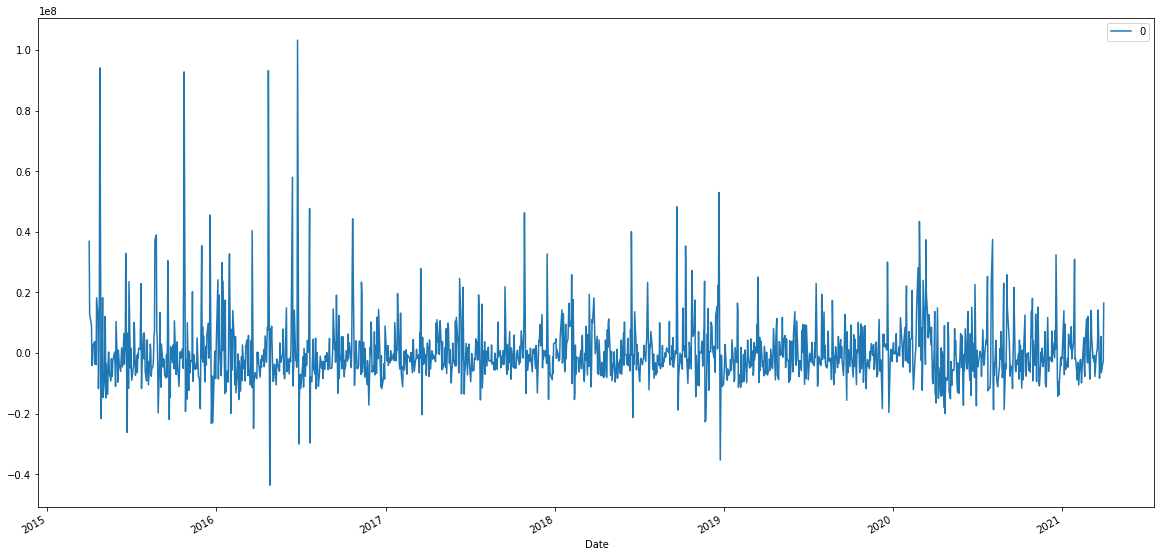

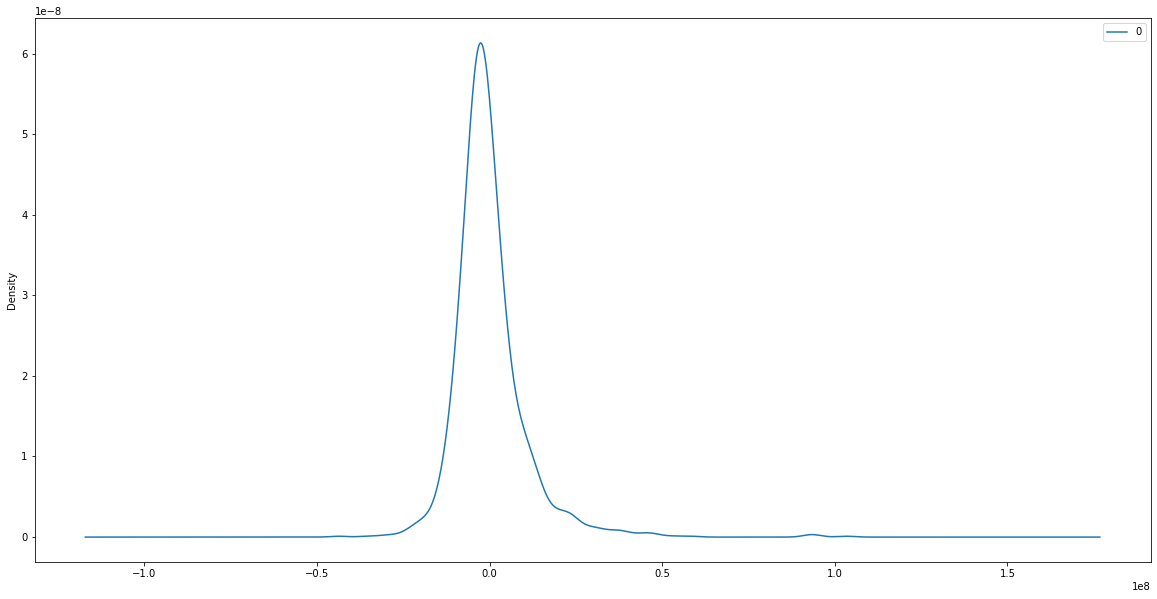

                  0
count  1.511000e+03
mean   5.605306e+04
std    1.075570e+07
min   -4.362672e+07
25%   -5.315694e+06
50%   -1.731173e+06
75%    3.282732e+06
max    1.032959e+08


In [28]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data['Volume'],order = (1,1,2))
model_fit = model.fit()
print(model_fit.summary())

# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(figsize=(20,10))
plt.show()
residuals.plot(kind='kde',figsize=(20,10))
plt.show()
print (residuals.describe())